![matplotlib](https://matplotlib.org/_static/logo2.png)
# Data Visualization with Matplotlib


### Scenario:
![pups](images/shelter-pups.jpeg)
It's back to our animal shelter data!!! 

If you do not have the dataset clean and ready from the last exercise, we have a few functions to help later in the lesson.

While it is nice to have summary tables, visualizations are also great. We want a few visualizations to explore animal shelter demographics.


### Activation: Why is visualization important?


There are a lot of visualizations out there these days.

Ultimately they are about quickly revealing relationships and anomolies.

While we will review what makes a **GOOD** visualization later, we will cover a few basic types today.  


### Learning Goals:

After today, you will be able to:

- Explain and understand different types plots and their use cases
- Identify and adjust the anatomy of a matplotlib plot
- Explain the difference between plot types and justify their use cases:
    - barplots
    - histogram
    - scatter plot
    - pie char
- Visualize data using the matplotlib library in python

### Step 1: Types of plots

Before we start creating, let's take a look at some [types](https://datavizproject.com/) of visualizations.

Let's look at some [examples from python graphs](https://python-graph-gallery.com/)

The Matplotlib plotting library provides a range of built in functions to start visualizing data with minimum effort. Let's import the module pyplot in matplotlib as well as numpy to generate some sample data before creating plots from our animal shelter data.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set plot space as inline for inline plots display
%matplotlib inline


![msatplot](https://python-graph-gallery.com/wp-content/uploads/Logo_PGG_full-3.jpg)

The [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) has some great resources to guide you through the code needed to create each type of matplotlib plot. 

### Plot Anatomy
Let's spend some time on the terminology of a plot. There are a lot of options to set in matplotlib plots, so let's identify some common terminology. 

The sequence of events with matplotlib are:

| Step | Code Example |
| :---- | :------------ |
| 1. Create figure and axis objects | `fig, ax = plt.subplots()` |
| 2. Create vizualization | `plt.bar` |
| 3. Make adjustments | `plt.title`, `ax.set_xticks`, etc |
| 4. Show final plot | `plt.show()` . |


The [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) shows a list of options you can set within a plot.

<img src="https://matplotlib.org/_images/sphx_glr_anatomy_001.png" width=550>


Let's look [how they created this plot.](https://matplotlib.org/gallery/showcase/anatomy.html)

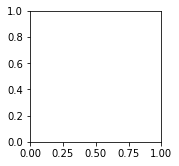

In [42]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 3, 1, aspect=1)

### 1 Barplots
Barplots are used for displaying __one dimensional__, __discrete__ data. You call plt.bar with two arguments:
- the x — a list of x-positions for each bar
- the y-values — a list of heights for each bar

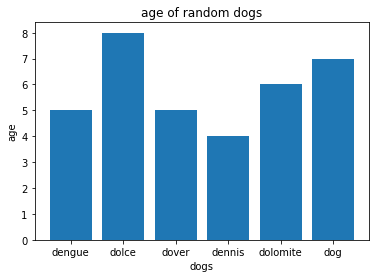

In [43]:
# an example of a bar plot
ax = plt.subplot()
our_dogs = ["dengue", "dolce", "dover", "dennis", "dolomite", "dog"]
dogs_age = [5, 8, 5, 4, 6, 7]

ax.bar(our_dogs, dogs_age)

ax.set_title('age of random dogs')
ax.set_xlabel('dogs')
ax.set_ylabel('age')
plt.show()

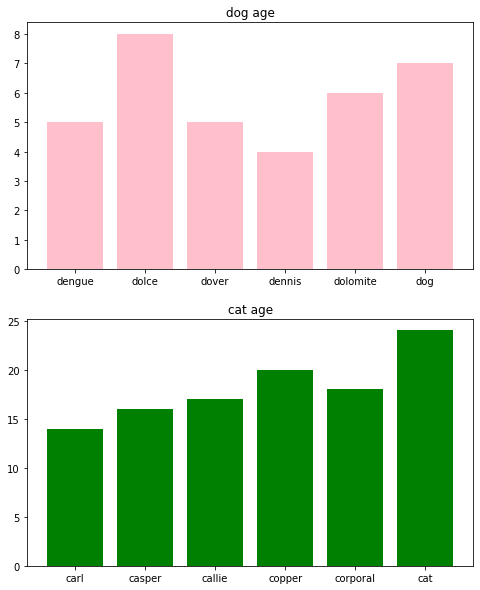

In [44]:
# utilizing the subplot function and creating subplots
our_cats = ["carl", "casper", "callie", "copper", "corporal", "cat"]
cats_age = [14, 16, 17, 20, 18, 24]

fig, (top, bottom) = plt.subplots(2, 1, figsize=(8, 10))

top.bar(our_dogs, dogs_age, color='pink')
top.set_title('dog age')

bottom.bar(our_cats, cats_age, color='green')
bottom.set_title('cat age')

plt.show()

What is something that you notice here that needs to be fixed?

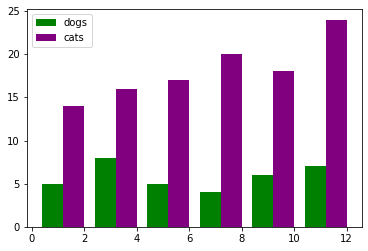

In [45]:
# we can create overlaid or side-by-side bargraph. You need
# to shift the x value by width to accommodate for two graphs.

fig = plt.figure()
n = 1  # This is our first dataset (out of 2)
t = 2  # Number of datasets
d = 6  # Number of sets of bars
w = 0.8  # Width of each bar

# essentially, this list comprehension gives us the position
dog_values = [t*element + w*n for element in range(d)]

# of the position of dogs
plt.bar(dog_values, dogs_age, color='green')


n = 2  # This is our second dataset (out of 2)
t = 2  # Number of datasets
d = 6  # Number of sets of bars
w = 0.8  # Width of each bar

cat_values = [t*element + w*n for element in range(d)]

plt.bar(cat_values, cats_age, color='purple')
plt.legend(["dogs", "cats"])

In [46]:
print(dog_values)
print(cat_values)

[0.8, 2.8, 4.8, 6.8, 8.8, 10.8]
[1.6, 3.6, 5.6, 7.6, 9.6, 11.6]


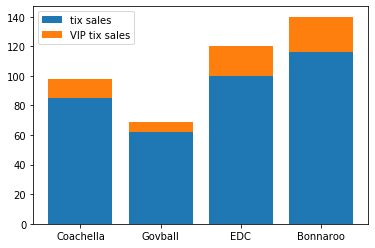

In [47]:
# stacked barplots
ax = plt.subplot()
music_festivals = ["Coachella", "Govball", "EDC", "Bonnaroo"]
ticket_sales_in_millon = [85, 62, 100, 116]
vip_ticket_sales_in_millon = [13, 7, 20, 24]

plt.bar(music_festivals, ticket_sales_in_millon)
plt.bar(music_festivals, vip_ticket_sales_in_millon,
        bottom=ticket_sales_in_millon)

plt.legend(["tix sales", "VIP tix sales"])
plt.show()

### Bar plot - animal shelter dataset

Let's make a bar plot comparing dogs and cats by month when they are admitted to the shelter.

In [48]:
animal_shelter_df = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [49]:
animal_shelter_df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


In [50]:
animal_shelter_df.DateTime = pd.to_datetime(animal_shelter_df.DateTime)

In [51]:
animal_shelter_df['Month'] = animal_shelter_df.DateTime.dt.month

In [52]:
dogs_and_cats = animal_shelter_df.loc[animal_shelter_df['Animal Type'].isin(['Dog', 'Cat'])]

In [61]:
count_by_month = dogs_and_cats.loc[:, ['month', 'Animal ID', 'Animal Type']].groupby(['Animal Type', 'month']).count()

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [60]:
count_by_month


NameError: name 'count_by_month' is not defined

In [ ]:
count_by_month.loc['Cat'].plot.bar()

In [ ]:
count_by_month.loc['Dog'].plot.bar()

### 2 Histogram
Histograms are like barplots in the sense that it describe __one-dimensional__ data. A histogram divides the variable into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing __continuous__ variables. <br>

From the documentation: compute and draw the histogram of x. The return value is a tuple (__n, bins, patches__) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

Comparison of barplots and histogram
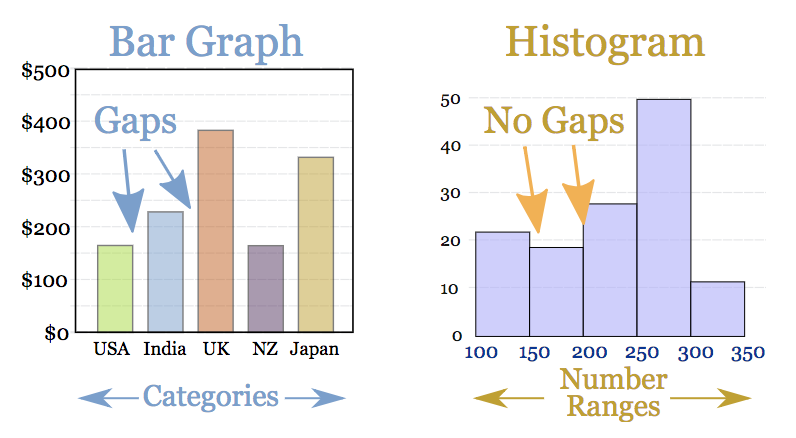

In [ ]:
# Set seed for reproducability
np.random.seed(2018)

# Generate 1000 values from 0 standard normal distribution
x = np.random.randn(100000)

# Plot the distogram with hist() function
plt.hist(x, bins=1000, color='purple')

plt.xlabel('Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

In [ ]:
# overlaid histograms for two distributions
# plotting two histograms
mu1, sigma1 = 0, 0.1  # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
mu2, sigma2 = 0.2, 0.1
s2 = np.random.normal(mu2, sigma2, 1000)
plt.figure(figsize=(10, 8))
plt.hist(s1, bins=200, density=True, alpha=.5)
plt.hist(s2, bins=200, density=True, alpha=.5)
plt.show()

### 3. Scatterplot - visualizing two dimensional data
Scatterplots are usually used for visualizing two dimensional data (observations with two variables). It allows us to examine the relationship between two variables, thus it is sometimes called a correlation plot. 

In [ ]:
# generate some data -> the sine wave
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, label="Function: sin(x)")
plt.title('Scatter Plot in Matplotlib')
plt.legend()
plt.show()

In [ ]:
# examining correlation with height and weight
height = [63, 62, 60, 63, 64, 65, 68, 67, 64, 71, 72, 70, 73]
weight = [120, 115, 114, 119, 125, 130, 135, 140, 128, 140, 150, 165, 180]
plt.scatter(height, weight, color='r')
plt.show()
plt.legend()

In [ ]:
# generate some data -> the sine wave
fig = plt.figure()
x = np.linspace(0, 10, 100)
y = np.sin(x)
y_neg = -np.sin(x)
y_cos = np.cos(x)
y_cos_neg = -np.cos(x)
plt.plot(x, y, label="Function: sin(x)")
plt.plot(x, y_cos, label="Function: cos(x)")
plt.plot(x, y_neg, label="Function: -sin(x)")
plt.plot(x, y_cos_neg, label="Function: -cos(x)")
x = np.linspace(0, 10, 20)
y = np.sin(x)
y_neg = -np.sin(x)
y_cos = np.cos(x)
y_cos_neg = -np.cos(x)
plt.scatter(x, y, marker='*')
plt.scatter(x, y_cos, marker='o')
plt.scatter(x, y_neg, marker='+')
plt.scatter(x, y_cos_neg, marker='X')
plt.title('Scatter Plot in Matplotlib')
plt.legend(fancybox=True, shadow=True, bbox_to_anchor=(1, 1))
plt.show()

### 4 - Pie Charts

In [ ]:
# pie chart
music_genre = ['R&B', 'Rock', 'Country', 'House', 'Hip Hop', 'Techno']
num_people_like = [15, 5, 3, 7, 18, 3]

plt.figure(figsize=(5, 5))
plt.pie(num_people_like, labels=music_genre, autopct="%1d%%")

plt.axis('equal')
plt.title('Music Preference')

plt.show()

![seaborn](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/07/seaborn.png) 

# The good, the bad, the seaborn

## Goal 1: Create a list of best practices for data visualization

Documenting best practices:

- Reading 1: [article 1](https://www.jackhagley.com/What-s-the-difference-between-an-Infographic-and-a-Data-Visualisation)
- Reading 2: [article 2](https://thoughtbot.com/blog/analyzing-minards-visualization-of-napoleons-1812-march)
- Reading 3: [article 3](http://dataremixed.com/2016/04/the-design-of-everyday-visualizations/)
- Reading 4: [article 4](https://visme.co/blog/data-storytelling-tips/)
- Reading 5: [article 5](files/VisualizationsThatReallyWork.pdf)

Check out [r/dataisugly](https://www.reddit.com/r/dataisugly/) (the corollary of [r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful/))

<img src='https://preview.redd.it/l10duehbme351.jpg?width=640&crop=smart&auto=webp&s=389a4a0a4aacd6355df3c47874631da233ab36b1' width=400>

#### Whats wrong with this data visualization? (hint: so many things)

<img src="https://pbs.twimg.com/media/DNTFhGaXcAEbrMO.jpg" width=800>

Learning goals:
- Create a list of best practices for data visualization
- Identify the differences between matplotlib and seaborn
- Create a visualization with seaborn, applying best practices

## Goal 2:  Identify differences between seaborn & matplotlib


### Two code examples to accomplish the same plot:

**Resources:**
- [python graph gallery on seaborn](https://python-graph-gallery.com/seaborn/)
- [seaborn](https://seaborn.pydata.org/)


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Load in data
tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")


In [55]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


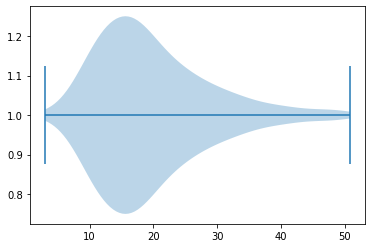

In [56]:
# Matplotlib:

# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Create violinplot
ax.violinplot(tips["total_bill"], vert=False)

# Show the plot
plt.show()

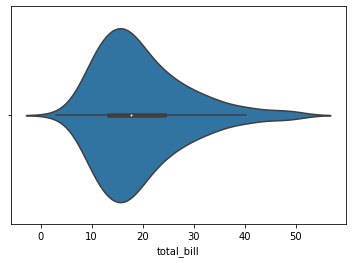

In [57]:
# Seaborn:

import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tips = sns.load_dataset("tips")
# tips = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

# Create violinplot
# sns.violinplot(x = "total_bill", data=tips)
sns.violinplot(x = "total_bill", data=tips)

# Show the plot
plt.show()

In [59]:
count_by_month

NameError: name 'count_by_month' is not defined

## Goal 3: Create a visualization with seaborn, applying best practices

[exercise from data world](https://data.world/makeovermonday/2018w37-paying-the-president)

Ideas:
- bar graph of \$ spent by category
- line graph of cumulative \$ spent on Trump properties/assets
- bar graph of \$ spent by month


In [ ]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/5qxp2ldwsel3ow2pq5mkvfas2rfaup')


#### For extra fun:
[visualization challenges](http://www.storytellingwithdata.com/blog/2019/3/1/swdchallenge-visualize-this-data)

[seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)